# Regresion Lineal: Costo de un incidente de Seguridad

En este ejercicio se explican los fundamentos de la regresion lineal aplicada a un caso sencillo relacionado con la CyberSeguridad.

### Enunciado del ejercicio
El ejercicio consiste en predecir el costo de un incidente en base al numero de equipos afectados. El conjunto de datos es generado de manera aleatoria 

## 1.- Generacion del DataSet

In [1]:
import numpy as np
X = 2 * np.random.rand(100, 1)
y = 4 + 3 * X + np.random.randn(100, 1)
print("La longitud del DataSet es: ", len(X))

La longitud del DataSet es:  100


## 2.- Visualizacion del DataSet

In [2]:
import matplotlib.pyplot as plt
%matplotlib inline

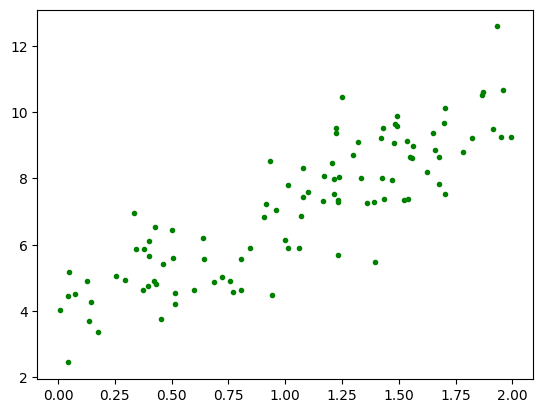

In [3]:
import matplotlib.pyplot as plt
plt.plot(X, y, "g.")
plt.show()


<function matplotlib.pyplot.show(close=None, block=None)>

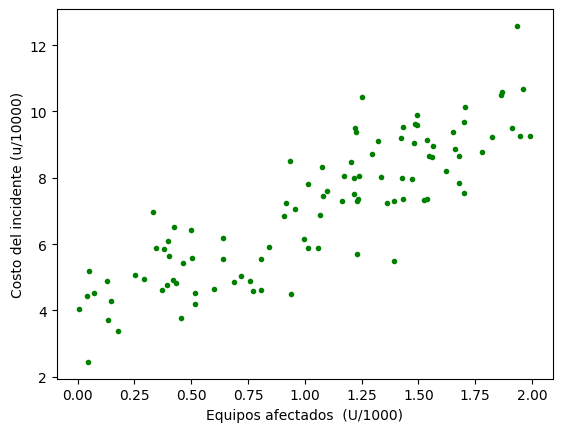

In [4]:
import matplotlib.pyplot as plt
plt.plot(X, y, "g.")
plt.xlabel("Equipos afectados  (U/1000)")
plt.ylabel("Costo del incidente (u/10000)")
plt.show

## 3.- Modificacion del DataSet 

In [5]:
import pandas as pd
data = {'No_Equipos_Afectados': X.flatten(), 'Costo': y.flatten()}
df = pd.DataFrame(data)
df.head(10)

,No_Equipos_Afectados,Costo
0,1.932812,12.580117
1,1.471583,7.962832
2,0.770912,4.582822
3,1.677786,7.835375
4,1.702583,7.540838
5,0.516785,4.203810
6,0.395390,4.753973
7,0.333567,6.960178
8,0.253433,5.069640
9,1.394297,5.489538


In [6]:
# Escalando el numero de equipos afectados
df['No_Equipos_Afectados'] = df['No_Equipos_Afectados'] * 1000
df['No_Equipos_Afectados'] = df['No_Equipos_Afectados'].astype(int)
#Escalado del costo
df['Costo'] = df['Costo'] * 10000
df['Costo'] = df['Costo'].astype(int)
df.head(10)

,No_Equipos_Afectados,Costo
0,1932,125801
1,1471,79628
2,770,45828
3,1677,78353
4,1702,75408
5,516,42038
6,395,47539
7,333,69601
8,253,50696
9,1394,54895


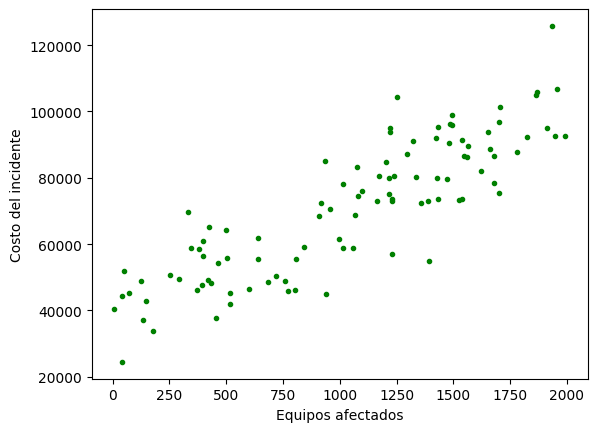

In [7]:
# Representacion Grafica del DataSet
import matplotlib.pyplot as plt
plt.plot(df['No_Equipos_Afectados'], df['Costo'], "g.")
plt.xlabel("Equipos afectados")
plt.ylabel("Costo del incidente")
plt.show()

## 4.- Construccion del Modelo

In [8]:
import sklearn

In [9]:
from sklearn.linear_model import LinearRegression

In [10]:
#Construccion del Modelo y ajuste de la funcion de Hipotesis
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(df['No_Equipos_Afectados'].values.reshape(-1, 1), df['Costo'].values)


,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [11]:
#Parametro Theta 0
lin_reg.intercept_

np.float64(37810.47527215738)

In [12]:
# Parametro Theta 1
lin_reg.coef_

array([31.78334508])

In [13]:
#Prediccion para el valor minimo y maximo del DataSet de entrenamiento
X_min_max = np.array([[df['No_Equipos_Afectados'].min()], [df['No_Equipos_Afectados'].max()]])
y_train_pred = lin_reg.predict(X_min_max)

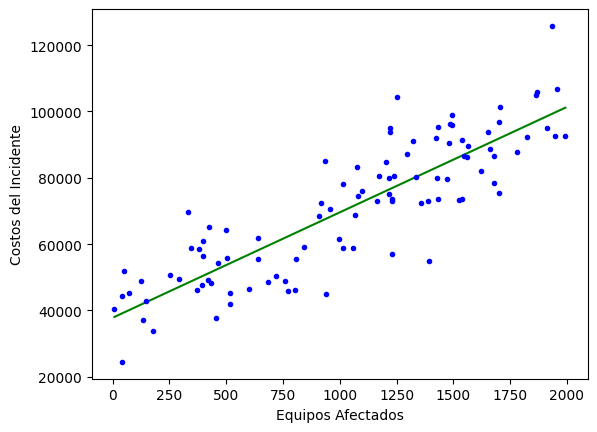

In [14]:
# Representacion Grafica de la funcion de Hipotesis generada
plt.plot(X_min_max, y_train_pred, "g-")
plt.plot(df['No_Equipos_Afectados'], df['Costo'], "b.")
plt.xlabel("Equipos Afectados")
plt.ylabel("Costos del Incidente")
plt.show()

## 5.- Prediccion de nuevos ejemplos

In [15]:
x_new = np.array([[1500]]) #Para 1500 equipos afectados 
#Prediccion del Costo que tendria el incidente
Costo = lin_reg.predict(x_new)
print("El Costo del incidente seria: $ ", int(Costo[0]))


El Costo del incidente seria: $  85485


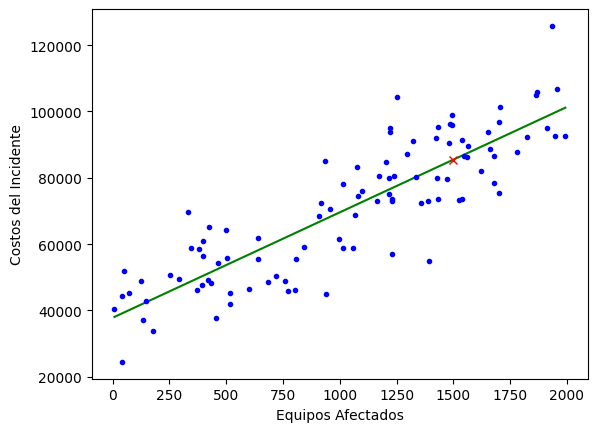

In [16]:
import matplotlib.pyplot as plt
plt.plot(X_min_max, y_train_pred, "g-")
plt.plot(df['No_Equipos_Afectados'], df['Costo'], "b.")
plt.plot(x_new, Costo, "rx")
plt.xlabel("Equipos Afectados")
plt.ylabel("Costos del Incidente")
plt.show()